In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
import gc
import pathlib

In [2]:
save_plots = True

show_titles = False

show_grid = False

## Create plots directory, if missing
plotsDirectory = (str(pathlib.Path.home())
                  + '/vertex-reconstruction-studies/plots/studies_on_full_data/'
                  + 'reconstruction_efficiency_analysis/')
pathlib.Path(plotsDirectory).mkdir(parents=True, exist_ok=True)

# $B^0 \rightarrow J/\psi (\rightarrow \mu^+\mu^-) K^0_S(\rightarrow \pi^+\pi^-)$
## Import MC data

In [3]:
inputMC = '~/data/LHCbMC_2016-2017-2018_MagUpDown_B2JPsiK_Ttracks_v6.h5'

In [4]:
tick = time.perf_counter()
df_MC_reco = pd.read_hdf(inputMC, key='LHCbMC_B0')
tock = time.perf_counter()
print(f"Monte Carlo imported in {tock - tick:0.4f} seconds.")

Monte Carlo imported in 0.7484 seconds.


In [5]:
tick = time.perf_counter()
df_MC_truth = pd.read_hdf(inputMC, key='LHCbMCTruth_B0')
tock = time.perf_counter()
print(f"Monte Carlo Truth imported in {tock - tick:0.4f} seconds.")

Monte Carlo Truth imported in 12.2030 seconds.


In [6]:
tick = time.perf_counter()
df_MC = pd.merge(df_MC_truth, df_MC_reco.loc[df_MC_reco['MC_key'] >= 0, :].drop('TrackType', axis='columns').groupby('MC_key').first(), how='left', on='MC_key')
tock = time.perf_counter()
print(f"Monte Carlo merged in {tock - tick:0.4f} seconds.")

Monte Carlo merged in 106.6608 seconds.


In [7]:
KS0ZVertexLowerBound = 0
KS0ZVertexUpperBound = 8000
df_MC = df_MC[
    (df_MC['MCTRUTH_KS0_ENDVERTEX_Z'] > KS0ZVertexLowerBound)
    & (df_MC['MCTRUTH_KS0_ENDVERTEX_Z'] < KS0ZVertexUpperBound)]
df_MC

,MCTRUTH_B0_ENDVERTEX_X,MCTRUTH_B0_ENDVERTEX_Y,MCTRUTH_B0_ENDVERTEX_Z,MCTRUTH_KS0_ENDVERTEX_X,MCTRUTH_KS0_ENDVERTEX_Y,MCTRUTH_KS0_ENDVERTEX_Z,MCTRUTH_pip_PX,MCTRUTH_pip_PY,MCTRUTH_pip_PZ,MCTRUTH_pim_PX,...,DTF_FixJPsiKaon_PIDSubs_pim_PZ,DTF_FixJPsiKaon_PIDSubs_pip_PX,DTF_FixJPsiKaon_PIDSubs_pip_PY,DTF_FixJPsiKaon_PIDSubs_pip_PZ,DTF_FixJPsiKaon_PIDSubs_mum_PX,DTF_FixJPsiKaon_PIDSubs_mum_PY,DTF_FixJPsiKaon_PIDSubs_mum_PZ,DTF_FixJPsiKaon_PIDSubs_mup_PX,DTF_FixJPsiKaon_PIDSubs_mup_PY,DTF_FixJPsiKaon_PIDSubs_mup_PZ
MC_key,,,,,,,,,,,,,,,,,,,,,
0,0.4864,0.0393,17.688801,-17.838699,31.001200,1540.456055,-715.599976,1456.510010,61921.261719,-522.849976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.8422,-0.0882,4.923600,-11.957000,12.349800,217.799698,-968.419983,1152.150024,17645.210938,-394.549988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.2859,0.0505,-13.598600,75.121002,209.081604,4393.343750,583.880005,1038.829956,22917.589844,222.190002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.7288,-0.3998,-20.649099,-58.431499,-3.972900,313.157410,-946.650024,-229.690002,4776.669922,-986.140015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.5984,-0.1680,22.965599,-32.072899,88.717102,299.092804,-566.729980,1590.390015,5024.930176,-86.220001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6878845,0.7943,0.1800,-52.271702,-106.560997,255.741592,3063.681152,-78.089996,215.770004,3857.719971,-775.039978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6878846,0.2053,0.2199,-11.981800,-0.447000,0.446100,0.946600,-202.000000,-30.190001,118.980003,181.919998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6878847,2.8503,-2.1199,-13.416300,21.202000,-208.085403,1945.437256,-60.820000,-1405.660034,13414.910156,246.839996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
## Cleanup
del(df_MC_truth)
del(df_MC_reco)
gc.collect()

295

## Combined $B^0$ and $K_S^0$ reconstruction efficiencies
Here it is assumed that $J/\psi$ reconstruction never fails, which is sort of true.

In [9]:
reconstructibleMuons = (df_MC['mum_Reconstructible']=='ChargedLong') & (df_MC['mup_Reconstructible']=='ChargedLong')
reconstructedMuons = (df_MC['mum_Reconstructed']=='ChargedLong') & (df_MC['mup_Reconstructed']=='ChargedLong')

reconstructibleTTracks = (df_MC['pim_Reconstructible']=='ChargedTtrack') & (df_MC['pip_Reconstructible']=='ChargedTtrack')
reconstructedTTracks = (df_MC['pim_Reconstructed']=='ChargedTtrack') & (df_MC['pip_Reconstructed']=='ChargedTtrack')

allReconstructedEvents = ((df_MC['Rec_key'] >= 0) & (df_MC['TrackType'] == 'T'))

In [10]:
selectionCandidates = (
    reconstructibleMuons & reconstructedMuons
    & reconstructibleTTracks & reconstructedTTracks
)
    
selectionPassed = selectionCandidates & allReconstructedEvents

In [11]:
binning = np.linspace(KS0ZVertexLowerBound, KS0ZVertexUpperBound, 40)
KS0ZTrueDecayVertices = df_MC['MCTRUTH_KS0_ENDVERTEX_Z']

binnedCandidates, _ = np.histogram(KS0ZTrueDecayVertices[selectionCandidates], bins=binning)
binnedPassed, _ = np.histogram(KS0ZTrueDecayVertices[selectionPassed], bins=binning)

binnedEfficiencies = binnedPassed / binnedCandidates
binnedEfficiencyErrors = np.sqrt((binnedEfficiencies * (1- binnedEfficiencies)) / (binnedCandidates))

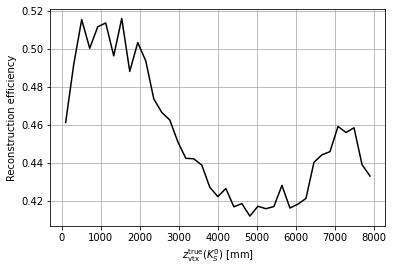

In [12]:
binningMidpoints = (binning[1:] + binning[:-1]) / 2

plt.plot(binningMidpoints,
         binnedEfficiencies,
         color='black', linestyle='-', marker='')
plt.xlabel(r"$z_\mathrm{vtx}^\mathrm{true}(K_S^0)$ [mm]")
plt.ylabel("Reconstruction efficiency")
if show_titles:
    plt.title("$K^0_S$ & $B^0$ reconstruction efficiency vs. $K^0_S$ true decay vertex")
plt.grid()
if save_plots:
    plt.savefig(plotsDirectory + 'KS0_B0_reco_efficiency.pdf', bbox_inches='tight')
plt.show()

In [13]:
print("z\t\tcandidates\treco\tefficiency\terror")
for midpoint, candidates, passed, efficiency, error in zip(
    binningMidpoints, binnedCandidates, binnedPassed, binnedEfficiencies, binnedEfficiencyErrors
):
    print("".join("{:.2f}\t\t{}\t\t{}\t{:.3f}\t\t{:.3f}".format(
        midpoint,
        candidates,
        passed,
        efficiency,
        error
    )))

z		candidates	reco	efficiency	error
102.56		709		327	0.461		0.019
307.69		1013		498	0.492		0.016
512.82		1104		569	0.515		0.015
717.95		1741		871	0.500		0.012
923.08		1816		929	0.512		0.012
1128.21		1612		828	0.514		0.012
1333.33		1495		742	0.496		0.013
1538.46		1593		822	0.516		0.013
1743.59		1512		738	0.488		0.013
1948.72		1518		764	0.503		0.013
2153.85		1578		779	0.494		0.013
2358.97		15263		7229	0.474		0.004
2564.10		30531		14243	0.467		0.003
2769.23		30501		14106	0.462		0.003
2974.36		27462		12387	0.451		0.003
3179.49		24665		10910	0.442		0.003
3384.62		23033		10182	0.442		0.003
3589.74		20935		9184	0.439		0.003
3794.87		19366		8270	0.427		0.004
4000.00		17875		7546	0.422		0.004
4205.13		16955		7230	0.426		0.004
4410.26		15816		6592	0.417		0.004
4615.38		14836		6208	0.418		0.004
4820.51		14053		5788	0.412		0.004
5025.64		13415		5595	0.417		0.004
5230.77		12567		5225	0.416		0.004
5435.90		12204		5088	0.417		0.004
5641.03		11339		4854	0.428		0.005
5846.15		11083		4612	0.416		0.005
6